In [1]:
import numpy as np
import pandas as pd 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
columns = ['target','ids','date','flag','user','text']
df = pd.read_csv("./tweet.csv", encoding='ISO-8859-1',names=columns)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
df.user.value_counts()

user
lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
                  ... 
67trinity            1
Sibby                1
mAnyA_15             1
49ersfan111          1
bpbabe               1
Name: count, Length: 659775, dtype: int64

In [7]:
df.date = pd.to_datetime(df['date'], format='%a %b %d %H:%M:%S %Y', errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   target  1600000 non-null  int64         
 1   ids     1600000 non-null  int64         
 2   date    0 non-null        datetime64[ns]
 3   flag    1600000 non-null  object        
 4   user    1600000 non-null  object        
 5   text    1600000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 73.2+ MB


## Choix des features

In [8]:
df = df[['target','text']]
df.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [9]:
df.target.value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

In [10]:
df.loc[df['target'] == 4, 'target'] = 1
df.target.value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

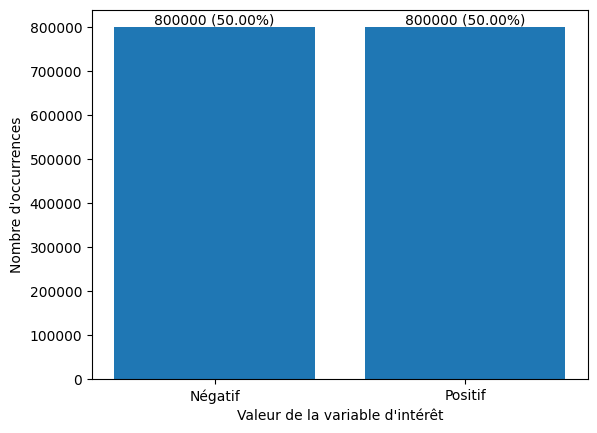

In [11]:
target_counts = df['target'].value_counts()

# Calculer la proportion pour chaque valeur de la variable d'intérêt (target)
target_proportions = df['target'].value_counts(normalize=True)

# Créer un graphique à barres pour visualiser la distribution
plt.bar(target_counts.index, target_counts.values)

# Ajouter les étiquettes des barres (nombre d'occurrences et proportion)
for i, count in enumerate(target_counts):
    proportion = target_proportions[i]
    plt.text(i, count, f"{count} ({proportion:.2%})", ha='center', va='bottom')

# Étiqueter l'axe des x et y
plt.xlabel('Valeur de la variable d\'intérêt')
plt.ylabel('Nombre d\'occurrences')

# Ajouter une légende aux barres
plt.xticks(target_counts.index, ['Négatif', 'Positif'])

# Afficher le graphique
plt.show()

In [12]:
# Sélectionner aléatoirement 10 000 tweets positifs
tweets_positifs = df[df['target'] == 1].sample(n=15000, random_state=42)

# Sélectionner aléatoirement 10 000 tweets négatifs
tweets_negatifs = df[df['target'] == 0].sample(n=15000, random_state=42)

# Concaténer les tweets positifs et négatifs sélectionnés
df_select = pd.concat([tweets_positifs, tweets_negatifs])

# Réinitialiser les index
df_select = df_select.reset_index(drop=True)
df_select

,target,text
0,1,Is lookin 4ward to a long weekend really dont...
1,1,#myweakness Is music and i live to meet the p...
2,1,figured out the Internet on my new iPod
3,1,@hillsongunited can't wait to worship with you...
4,1,@sillybeggar Congrats James !! I'm sure the bo...
...,...,...
29995,0,On twitter about to tweet as much as I can bef...
29996,0,@AndrewFyfe Constitution is too long a word to...
29997,0,I can't get to put TwitterFon in my iPod Touch...
29998,0,@grooveworksENT !!!!!


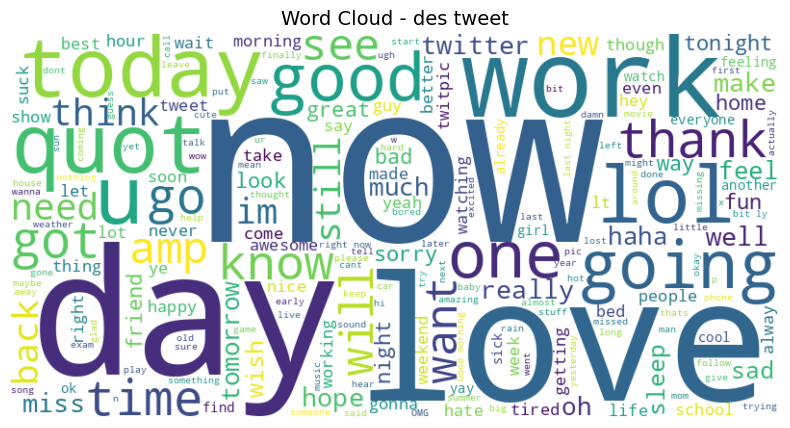

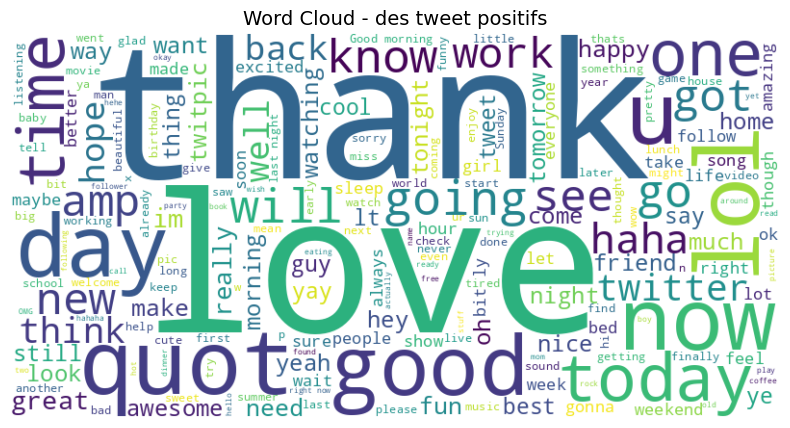

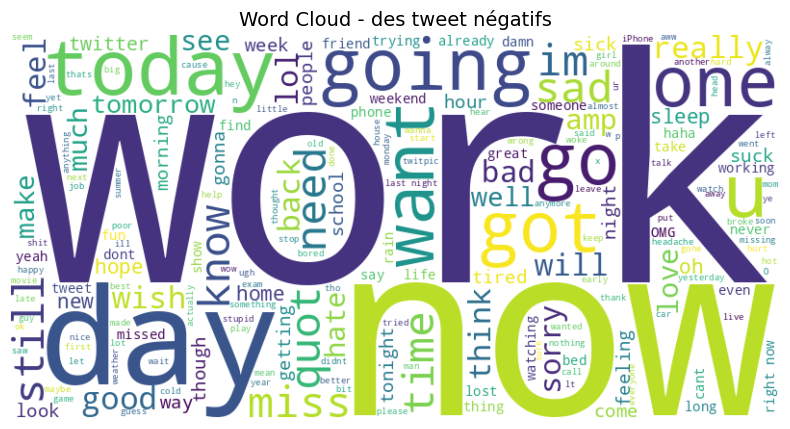

In [13]:
# Fonction pour générer le word cloud
def generer_wordcloud(tweets, titre):
    tout_texte = ' '.join(tweets)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tout_texte)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(titre, fontsize=14)
    plt.axis('off')
    plt.show()

# Générer le word cloud pour chaque type de sentiment
generer_wordcloud(df_select['text'], 'Word Cloud - des tweet')
generer_wordcloud(tweets_positifs['text'], 'Word Cloud - des tweet positifs')
generer_wordcloud(tweets_negatifs['text'], 'Word Cloud - des tweet négatifs')

## Netoyage du text

In [14]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [15]:
nltk.download('wordnet')
# Analyse sémantique, et la génération de synonymes
nltk.download('stopwords')
# Les mots de stopwords sont souvent retirés des textes pour réduire le bruit
nltk.download('punkt')
#  Il divise le texte en phrases et les phrases en mots (ou "tokens")

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [16]:
# Précompilation des expressions régulières
special_char_pattern = re.compile(r"[^\w\s]")

# Définition des mots vides en dehors de la fonction
stop_words = set(stopwords.words("english"))

def clean_text(text):
    # Suppression des caractères spéciaux et de la ponctuation
    # text = re.sub(r"[^\w\s]", "", text)
    text = special_char_pattern.sub("", text)
    
    # Conversion en minuscules
    text = text.lower()
    
    # Tokenisation du texte
    tokens = word_tokenize(text)
    
    # Suppression des mots vides
    # stop_words = set(stopwords.words("english"))
    # tokens = [word for word in tokens if word not in stop_words]
    tokens = [word for word in tokens if word not in stop_words]
    
    # Joindre les tokens en une seule chaîne
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

# Appliquer le nettoyage du texte sur la colonne 'texte'
df_select['texte_nettoye'] = df_select['text'].apply(clean_text)

df_select

,target,text,texte_nettoye
0,1,Is lookin 4ward to a long weekend really dont...,lookin 4ward long weekend really dont want go ...
1,1,#myweakness Is music and i live to meet the p...,myweakness music live meet people make
2,1,figured out the Internet on my new iPod,figured internet new ipod
3,1,@hillsongunited can't wait to worship with you...,hillsongunited cant wait worship guys tonight ...
4,1,@sillybeggar Congrats James !! I'm sure the bo...,sillybeggar congrats james im sure book going ...
...,...,...,...
29995,0,On twitter about to tweet as much as I can bef...,twitter tweet much go funeral hate going funer...
29996,0,@AndrewFyfe Constitution is too long a word to...,andrewfyfe constitution long word write im goi...
29997,0,I can't get to put TwitterFon in my iPod Touch...,cant get put twitterfon ipod touch already itu...
29998,0,@grooveworksENT !!!!!,grooveworksent


## Visualisation en global des mot tirés

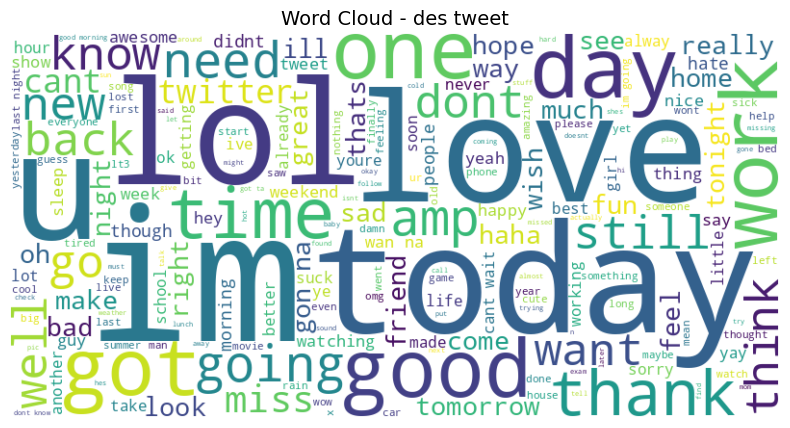

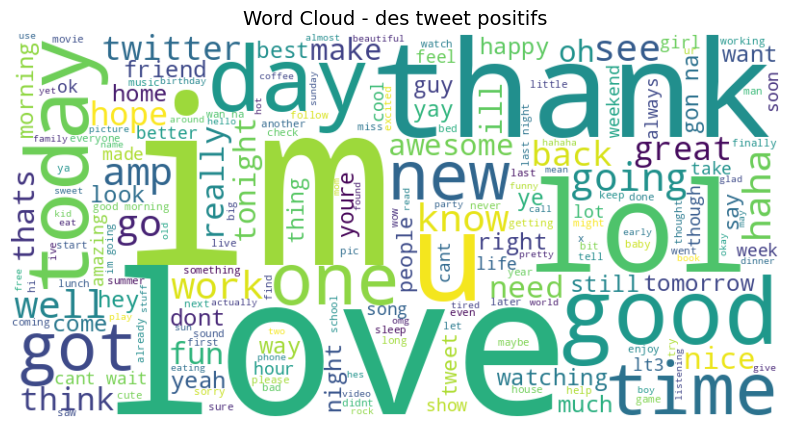

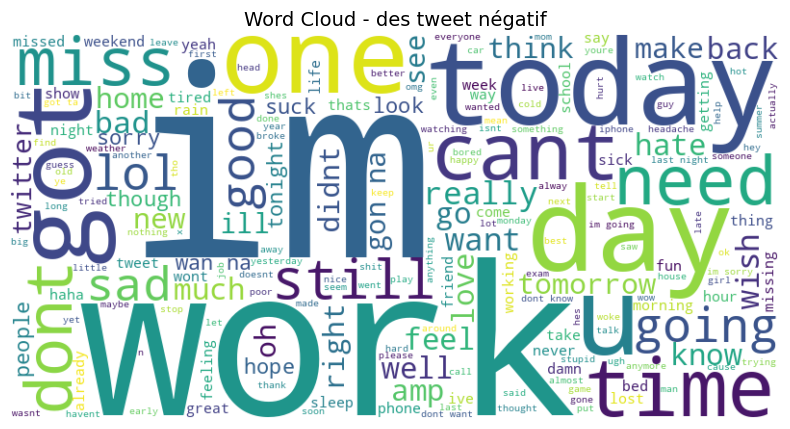

In [17]:
# Générer le word cloud pour chaque type de sentiment
generer_wordcloud(df_select['texte_nettoye'], 'Word Cloud - des tweet')
# Filtrer les tweets positifs
tweets_positifs = df_select[df_select['target'] == 1]['texte_nettoye']
generer_wordcloud(tweets_positifs, 'Word Cloud - des tweet positifs')
# Filtrer les tweets positifs
tweets_negatifs = df_select[df_select['target'] == 0]['texte_nettoye']
generer_wordcloud(tweets_negatifs, 'Word Cloud - des tweet négatif')

## Vectorisation de Texte

In [18]:
# Créer une instance du vectoriseur TfidfVectorizer
vectorizer = TfidfVectorizer()

# Appliquer le vectoriseur sur la colonne 'texte_nettoye'
features = vectorizer.fit_transform(df_select['texte_nettoye'])

# Afficher les dimensions de la matrice de caractéristiques
print("Dimensions de la matrice de caractéristiques :", features.shape)

Dimensions de la matrice de caractéristiques : (30000, 45053)


In [19]:
# Diviser les données en ensembles d'entraînement et de test de façon stratifiée
X_train, X_test, y_train, y_test = train_test_split(features, df_select['target'], test_size=0.2, stratify=df_select['target'], random_state=42)

## Regression Logistique

### Sans normalisation

In [20]:
# Construire le modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

# Prédire les probabilités pour les ensembles d'entraînement et de test
y_train_pred = model.predict_proba(X_train)[:, 1]
y_test_pred = model.predict_proba(X_test)[:, 1]

In [21]:
from sklearn.metrics import roc_curve, auc

# Calculer les valeurs de la courbe ROC
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)

# Calculer l'AUC pour les ensembles d'entraînement et de test
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

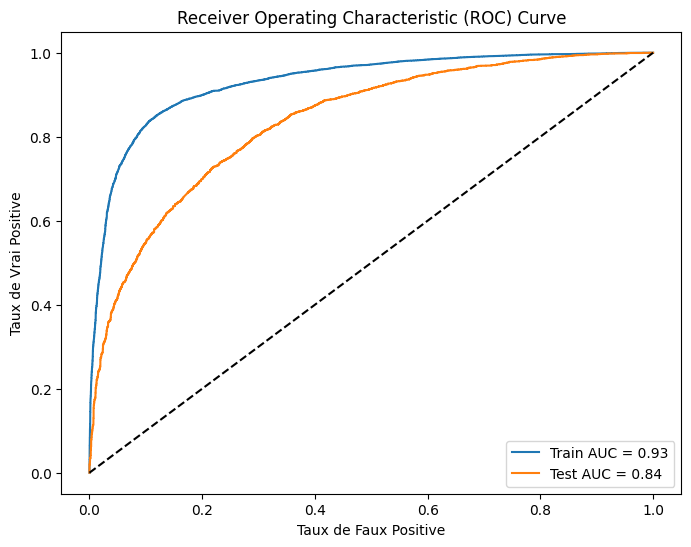

In [22]:
# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='Train AUC = {:.2f}'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='Test AUC = {:.2f}'.format(auc_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de Faux Positive')
plt.ylabel('Taux de Vrai Positive')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Overview Performance

In [23]:
# Calculer les performances sur les ensembles d'entraînement et de test
def performance_all(model, X_train, X_test):

    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    train_precision = precision_score(y_train, model.predict(X_train))
    train_recall = recall_score(y_train, model.predict(X_train))
    train_f1 = f1_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    test_precision = precision_score(y_test, model.predict(X_test))
    test_recall = recall_score(y_test, model.predict(X_test))
    test_f1 = f1_score(y_test, model.predict(X_test))

    # Créer un tableau des performances
    performance_table = pd.DataFrame({
        'Performance': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
        'Train': [train_accuracy, train_precision, train_recall, train_f1],
        'Test': [test_accuracy, test_precision, test_recall, test_f1]
    })
    return performance_table

performance_all(model, X_train, X_test)

,Performance,Train,Test
0,Accuracy,0.862542,0.751167
1,Precision,0.854709,0.739587
2,Recall,0.873583,0.775333
3,F1 Score,0.864043,0.757038


#### HyperParametre

In [31]:
from sklearn.model_selection import GridSearchCV

# Définir les paramètres de la grille
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1',"l2"],
    'solver': ['liblinear']  # liblinear est compatible avec l1 et l2
    # 'max_iter': [200, 500, 1000, 2000]  # Ajout de max_iter
}

# Initialiser GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=200), param_grid, cv=5, scoring='f1')

# Appliquer GridSearchCV sur les données normalisées
grid_search.fit(X_train, y_train)

# Meilleurs paramètres
print("Best parameters found: ", grid_search.best_params_)

# Utiliser les meilleurs paramètres pour construire le modèle final
model = LogisticRegression(max_iter=200, **grid_search.best_params_)
model.fit(X_train, y_train)

performance_all(model, X_train, X_test)

Best parameters found:  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


,Performance,Train,Test
0,Accuracy,0.862750,0.751500
1,Precision,0.854826,0.740057
2,Recall,0.873917,0.775333
3,F1 Score,0.864266,0.757285


On observe seulement une petite variation apres la modification des hyperparametre. \
Optons pour la normalisation s'il y a des ameliorations

#### CrossValidation

In [32]:
from sklearn.model_selection import cross_val_score

# Calculer les scores de validation croisée
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')

# Afficher les scores et la moyenne
print("Cross-validation F1 scores:", cv_scores)
print("Mean cross-validation F1 score:", cv_scores.mean())

Cross-validation F1 scores: [0.75010044 0.7585928  0.75480769 0.75567261 0.74691981]
Mean cross-validation F1 score: 0.7532186720191965


### Normalisation avec StandardScaler

In [34]:
from sklearn.preprocessing import StandardScaler

# Normaliser les données
scaler = StandardScaler(with_mean=False)
# with_mean=False car les matrices creuses ne supportent pas la normalisation avec la moyenne
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Construire le modèle de régression logistique
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

'''
# Prédire les probabilités pour les ensembles d'entraînement et de test
y_train_pred = model.predict_proba(X_train_scaled)[:, 1]
y_test_pred = model.predict_proba(X_test_scaled)[:, 1]
'''

performance_all(model, X_train_scaled, X_test_scaled)

,Performance,Train,Test
0,Accuracy,0.997042,0.652667
1,Precision,0.997083,0.670387
2,Recall,0.997000,0.600667
3,F1 Score,0.997042,0.633615


On remarque qu'ici, on observe un overfiting. Nous allons alors modifier les hyperparametres.

### HyperParametre

In [35]:
# Définir les paramètres de la grille
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # liblinear est compatible avec l1 et l2
}

# Initialiser GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1')

# Appliquer GridSearchCV sur les données normalisées
grid_search.fit(X_train_scaled, y_train)

# Meilleurs paramètres
print("Best parameters found: ", grid_search.best_params_)

# Utiliser les meilleurs paramètres pour construire le modèle final
model = LogisticRegression(**grid_search.best_params_)
model.fit(X_train_scaled, y_train)

performance_all(model, X_train_scaled, X_test_scaled)

Best parameters found:  {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


,Performance,Train,Test
0,Accuracy,0.796583,0.741500
1,Precision,0.770235,0.717111
2,Recall,0.845333,0.797667
3,F1 Score,0.806039,0.755247


Nous obtenons des resultats moins performant que celle ou la normalisation avec standardScaler.
Pour les matrices creuses comme celles produites par TfidfVectorizer, il est courant de ne pas appliquer StandardScaler sur les données d'entraînement et de test car la matrice TF-IDF est déjà normalisée


Les solveurs newton-cg, sag et lbfgs ne prennent en charge que  \
L2 régularisation avec formulation primitive. Le solveur liblinéaire \
prend en charge à la fois Régularisation L1 et L2, avec une double \
formulation uniquement pour la peine L2. La pénalité Elastic-Net n’est \
prise en charge que par le solveur de saga.

#### CrossValidation

In [36]:
from sklearn.model_selection import cross_val_score

# Calculer les scores de validation croisée
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='f1')

# Afficher les scores et la moyenne
print("Cross-validation F1 scores:", cv_scores)
print("Mean cross-validation F1 score:", cv_scores.mean())

Cross-validation F1 scores: [0.75272162 0.75642023 0.74874372 0.75504658 0.74678112]
Mean cross-validation F1 score: 0.7519426538410222


In [38]:
'''
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='f1')
print(f"Random Forest F1 Score (cross-validation): {rf_scores.mean()}")

# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_scores = cross_val_score(gb_model, X_train_scaled, y_train, cv=5, scoring='f1')
print(f"Gradient Boosting F1 Score (cross-validation): {gb_scores.mean()}")
'''

'\nfrom sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier\nfrom sklearn.model_selection import cross_val_score\n\n# Random Forest\nrf_model = RandomForestClassifier(n_estimators=100, random_state=42)\nrf_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring=\'f1\')\nprint(f"Random Forest F1 Score (cross-validation): {rf_scores.mean()}")\n\n# Gradient Boosting\ngb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)\ngb_scores = cross_val_score(gb_model, X_train_scaled, y_train, cv=5, scoring=\'f1\')\nprint(f"Gradient Boosting F1 Score (cross-validation): {gb_scores.mean()}")\n'